# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [21]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import create_engine

# Challenge 1

#### Read the `employees` dataset from Ironhack's database:
* db: `employees`
* table: `employees`

Save your data in a variable called `employees`.

In [4]:
# Creating the connection to the database:
driver = 'mysql+pymysql'
ip = '34.65.10.136'
username = 'data-students'
password = 'iR0nH@cK-D4T4B4S3'
db = 'employees'
connection_string  = f'{driver}://{username}:{password}@{ip}/{db}'

In [67]:
# getting all the data from the table. 
engine = create_engine(connection_string)
query = 'SELECT * FROM employees'
employees = pd.read_sql(query,engine)
employees.head(10)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [7]:
# Method 1: without pivot tables
employees.groupby('Department')['Salary'].mean()


Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [37]:
# Method 2: with pivot tables. I don't pass any aggrfunc because 'mean' is predefined
employees.pivot_table(index = 'Department', values = 'Salary')

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [38]:
# Creating pivot table with two indexes, calculating mean by default
employees.pivot_table(index = ['Department', 'Title'], values = 'Salary')

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [48]:
# your code here
employees.pivot_table(index = 'Title', values = ['Salary', 'Years'])

,Salary,Years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [49]:
# your code here
employees.pivot_table(index = ['Department', 'Title'], values = 'Salary', aggfunc = [np.mean, 'count'])

mean  count
                     Salary Salary
Department Title                  
HR         VP          70.0      1
           analyst     32.5      2
IT         VP          70.0      1
           analyst     32.5      2
           associate   60.0      1
Sales      associate   55.0      2

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [59]:
# your code here
employees.pivot_table(index = ['Department', 'Title'], values = ['Salary'], aggfunc = {'Salary':[np.median, min, max, np.std]})

Salary                       
                        max median   min       std
Department Title                                  
HR         VP          70.0   70.0  70.0       NaN
           analyst     35.0   32.5  30.0  3.535534
IT         VP          70.0   70.0  70.0       NaN
           analyst     35.0   32.5  30.0  3.535534
           associate   60.0   60.0  60.0       NaN
Sales      associate   55.0   55.0  55.0  0.000000

In [60]:
"""
In the VP titles, the median, min and max is the same value because there's just one input. That's also the reason
why there's no standard deviation.
The same case is for associates in IT. 
Although we could think this is the same case for associates in sales, it is not, because there are two workers in
this group but with exactly the same salary. That's the reason why all the values are the same and the standard 
deviation is 0 (not null).
For analysts in both departments HR and IT, there are two workers with different salaries and therefore there are
different values in median, mix and max and there is a value for standard deviation.
"""

"\nIn the VP titles, the median, min and max is the same value because there's just one input. That's also the reason\nwhy there's no standard deviation.\nThe same case is for associates in IT. \nAlthough we could think this is the same case for associates in sales, it is not, because there are two workers in\nthis group but with exactly the same salary. That's the reason why all the values are the same and the standard \ndeviation is 0 (not null).\nFor analysts in both departments HR and IT, there are two workers with different salaries and therefore there are\ndifferent values in median, mix and max and there is a value for standard deviation.\n"

#### Based on your comments, fill the missing values with an appropriate value.

In [61]:
# your code here
employees.pivot_table(index = ['Department', 'Title'], values = ['Salary'], aggfunc = {'Salary':[np.median, min, max, np.std]}, fill_value = 0)

Salary                     
                        max median min       std
Department Title                                
HR         VP            70   70.0  70  0.000000
           analyst       35   32.5  30  3.535534
IT         VP            70   70.0  70  0.000000
           analyst       35   32.5  30  3.535534
           associate     60   60.0  60  0.000000
Sales      associate     55   55.0  55  0.000000

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [64]:
# your code here
employees.pivot_table(index='Department', values = ['Salary'], aggfunc = {'Salary':['count', sum]})

Salary     
            count  sum
Department            
HR              3  135
IT              4  195
Sales           2  110

#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [66]:
# your code here
employees.pivot_table(index=['Department','Title'], values = ['Salary','Years'], aggfunc = {'Salary':np.mean, 'Years':sum})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [ ]:
# your code here

# Challenge 2

#### Read the `fitbit` dataset from Ironhack's database:
* db: `fitbit`
* table: `fitbit`

Save your data in a variable called `fitbit`.

In [68]:
# Connecting to database and reading table
db = 'fitbit'
connection_string  = f'{driver}://{username}:{password}@{ip}/{db}'
engine = create_engine(connection_string)
query = 'SELECT * FROM fitbit'
fitbit = pd.read_sql(query,engine)

In [69]:
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417\r
1,09-05-2015,3631,18925,14.11,4,611.0,316,61,60,2248,454,35,21,491\r
2,10-05-2015,3204,14228,10.57,1,602.0,226,14,77,1719,387,46,25,436\r
3,11-05-2015,2673,6756,5.02,8,749.0,190,23,4,9620,311,31,21,350\r
4,12-05-2015,2495,502,3.73,1,876.0,171,0,0,7360,407,65,44,491\r


#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [70]:
# Checking statistics
fitbit.describe()

,Calorie burned,Steps,Floors,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,11.724796,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185
std,916.307036,5594.836225,10.337370,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622
min,179.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,5.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000
50%,2974.000000,10413.000000,11.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000
75%,3233.000000,13916.500000,16.000000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000
max,4351.000000,26444.000000,101.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000


In [73]:
# Checking data types
fitbit.dtypes

Date                      object
Calorie burned             int64
Steps                      int64
Distance                  object
Floors                     int64
Minutes Sedentary         object
Minutes Lightly Active     int64
Minutes Fairly Active      int64
Minutes Very Active        int64
Activity Calories          int64
MinutesOfSleep             int64
MinutesOfBeingAwake        int64
NumberOfAwakings           int64
LengthOfRestInMinutes     object
dtype: object

#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [74]:
# Computing correlation between two columns using formula: df['A'].corr(df['B'])
fitbit['Minutes Very Active'].corr(fitbit['Steps'])

0.5714518481062608

#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [75]:
import matplotlib.pyplot as plt;

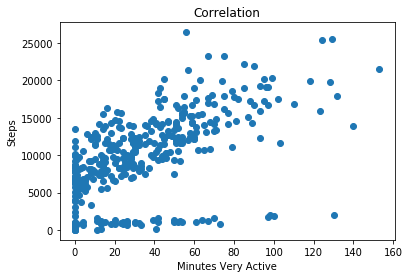

In [76]:

plt.scatter(fitbit['Minutes Very Active'], fitbit['Steps'])
plt.title('Correlation')
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')
plt.show()


#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [ ]:
"""
Seems to be a correlation between both columns, although there are quite spots counting steps even with no minutes
very active and some spots when although there are many minutes very active, there are few steps.

That indicates two things: First is that the person can walk in a quiet mode (non-active) and second one that the 
person can do other type of exercices in an active mode but without walking.
"""

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [94]:
# first we need to change the type for column 'Minutes Sedentary'
fitbit = fitbit.astype({'Minutes Sedentary': float})

In [95]:
fitbit['Minutes Sedentary'].corr(fitbit['Steps'])

0.07690608062990091

#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

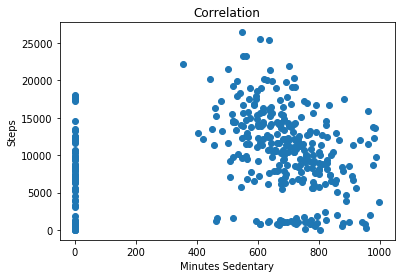

In [96]:
plt.scatter(fitbit['Minutes Sedentary'], fitbit['Steps'])
plt.title('Correlation')
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')
plt.show()

In [97]:
"""
The correlation value is very small, which indicates there is no clear correlation between those two columns.
The plot confirms that, with a column of many steps with 0 minuts sedentary but then also a very spread dot cloud
with no apparently relation.
"""

'\nThe correlation value is very small, which indicates there is no clear correlation between those two columns.\nThe plot confirms that, with a column of many steps with 0 minuts sedentary but then also a very spread dot cloud\nwith no apparently relation.\n'

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [98]:
fitbit['MinutesOfSleep'].corr(fitbit['Steps'])

0.1309856595083638

#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

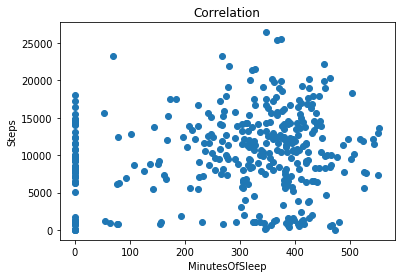

In [99]:
plt.scatter(fitbit['MinutesOfSleep'], fitbit['Steps'])
plt.title('Correlation')
plt.xlabel('MinutesOfSleep')
plt.ylabel('Steps')
plt.show()

In [ ]:
"""
There is a very light correlation between both columns, according to the value. But looking at the graph we can see that
the spots are quite spread so I will say there's no correlation at all.
"""

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [102]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [104]:
# Selecting 'columns' of fitbit df and applying corr() to all
cor_fit = fitbit[columns].corr()

In [105]:
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [107]:
# Minutes Very Active is the most correlated to Steps
cor_fit.sort_values(by='Steps', ascending =False)

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242


# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [108]:
# Connecting to database and reading table
db = 'time_grades'
connection_string  = f'{driver}://{username}:{password}@{ip}/{db}'
engine = create_engine(connection_string)
query = 'SELECT * FROM time_grades'
time_grades = pd.read_sql(query,engine)

In [109]:
time_grades.head()

,Name,Study time,Grade
0,Jose,4,4\r
1,Maria,9,7\r
2,David,8,9\r
3,Sonia,10,7\r
4,Samuel,20,9\r


#### Show visually the frequency distribution of the `time_grades` dataset.

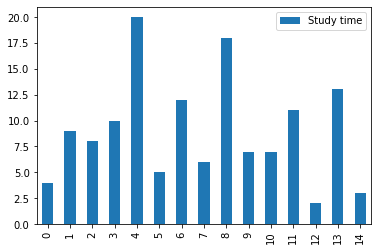

In [111]:
# your code here data['title'].value_counts()[:20].plot(kind='barh')
time_grades.plot(kind='bar')

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [113]:
# In order to calculate the correlation, we need to turn 'Grade' column to a number.
time_grades['Grade'].replace(regex=True,inplace=True,to_replace=r'\r',value=r'')
time_grades = time_grades.astype({'Grade': int})

In [114]:
# Pearson correlation
time_grades['Grade'].corr(time_grades['Study time'], method = 'pearson')

0.7980456073578858

In [115]:
# Spearman correlation
time_grades['Grade'].corr(time_grades['Study time'], method = 'spearman')

0.819658753036942

In [ ]:
"""
Although both correlations are different, they are quite similar rounding 0.81, which indicates a strong correlation
between Study time and Grade
"""

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

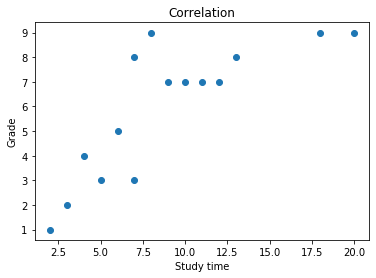

In [117]:
plt.scatter(time_grades['Study time'], time_grades['Grade'])
plt.title('Correlation')
plt.xlabel('Study time')
plt.ylabel('Grade')
plt.show()

In [ ]:
"""
The plot shows that there is a strong positive correlation. The more time spent studying, the higher grade you get
"""

#### Could you explain the difference between Pearson and Spearman correlations?

In [ ]:
"""
The pearson correlation measures a linear correlation between two variables while spearman correlation measures the
correlation between two variables even if it is not linear.

As there are some spots in the same row by different study time (look at grade 7, grade 8, grade 9), the pearson 
correlation is lower than the spearman one.
"""